<a href="https://colab.research.google.com/github/dekristie/ChallangeAluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


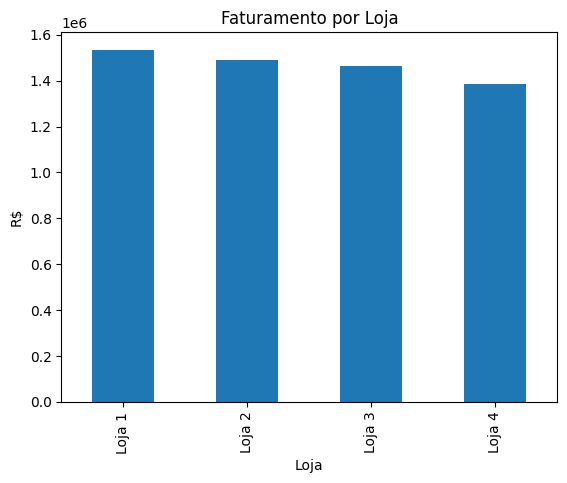

In [ ]:
# @title Faturamento Total por Loja

faturamento = dados.groupby('Loja')['Pre√ßo'].sum()
faturamento.plot(kind='bar', title='Faturamento por Loja', ylabel='R$')
plt.show()

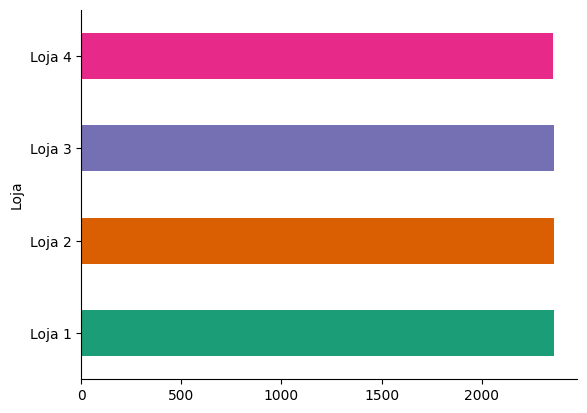

In [ ]:
# @title Loja

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('Loja').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 2. Vendas por Categoria


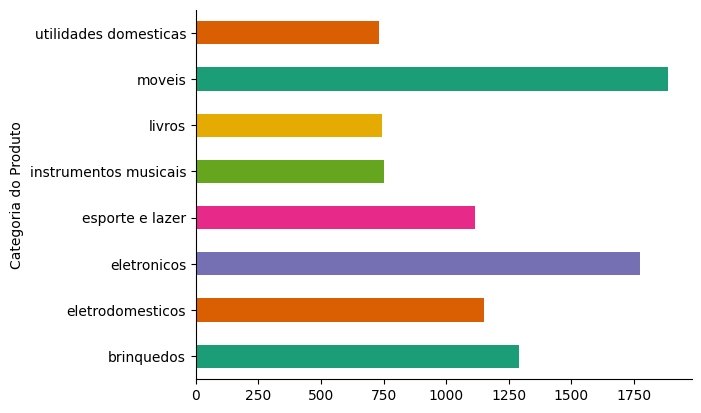

In [ ]:
# @title Categoria do Produto

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('Categoria do Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3. M√©dia de Avalia√ß√£o das Lojas

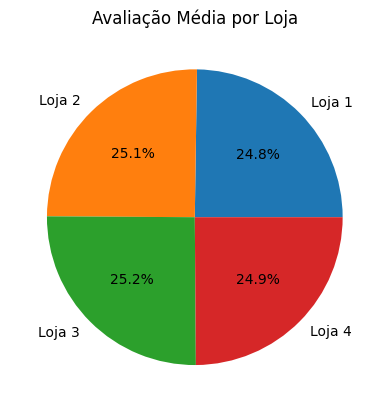

In [ ]:
# @title Avalia√ß√£o M√©dia por Loja

avaliacao = dados.groupby('Loja')['Avalia√ß√£o da compra'].mean()
avaliacao.plot(kind='pie', autopct='%1.1f%%', title='Avalia√ß√£o M√©dia por Loja')
plt.ylabel('')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupa e encontra os produtos mais vendidos
mais_vendidos = dados.groupby(['Loja', 'Produto']).size().reset_index(name='Contagem')
mais_por_loja = mais_vendidos.sort_values('Contagem', ascending=False).drop_duplicates('Loja')

# Agrupa e encontra os produtos menos vendidos
menos_por_loja = mais_vendidos.sort_values('Contagem', ascending=True).drop_duplicates('Loja')

# Junta os dados em um DataFrame para visualiza√ß√£o
produtos_vendidos = pd.DataFrame({
    'Loja': mais_por_loja['Loja'].values,
    'Mais Vendido': mais_por_loja['Produto'].values,
    'Menos Vendido': menos_por_loja['Produto'].values
})

# Exibe como tabela (estilo gr√°fico Power BI)
print("üìå Produtos Mais e Menos Vendidos por Loja:\n")
display(produtos_vendidos)


üìå Produtos Mais e Menos Vendidos por Loja:



Loja              Mais Vendido      Menos Vendido
0  Loja 2  Iniciando em programa√ß√£o  Jogo de tabuleiro
1  Loja 4                  Cama box       Celular ABXY
2  Loja 1             Guarda roupas           Guitarra
3  Loja 3             Kit banquetas   Blocos de montar

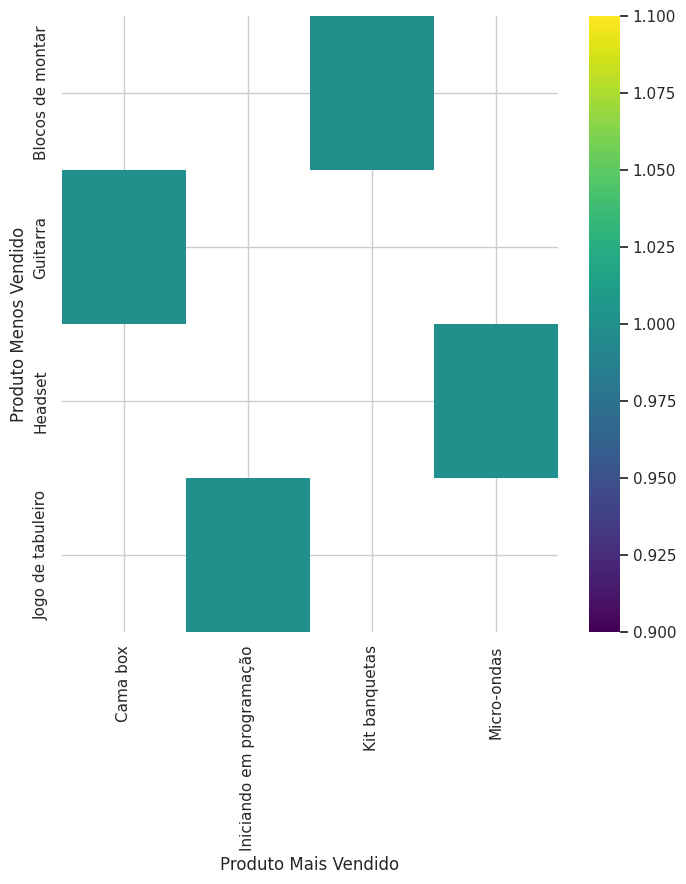

In [ ]:
# @title Produto Mais Vendido vs Produto Menos Vendido

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Produto Menos Vendido'].value_counts()
    for x_label, grp in tabela_produtos.groupby('Produto Mais Vendido')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Produto Mais Vendido')
_ = plt.ylabel('Produto Menos Vendido')

# 5. Frete M√©dio por Loja


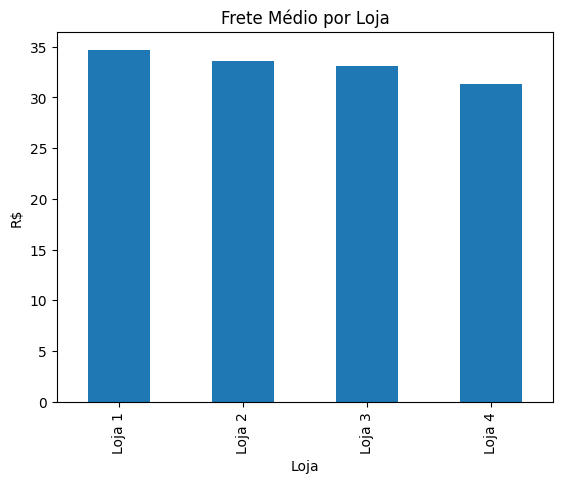

In [ ]:
frete = dados.groupby('Loja')['Frete'].mean()
frete.plot(kind='bar', title='Frete M√©dio por Loja', ylabel='R$')
plt.show()

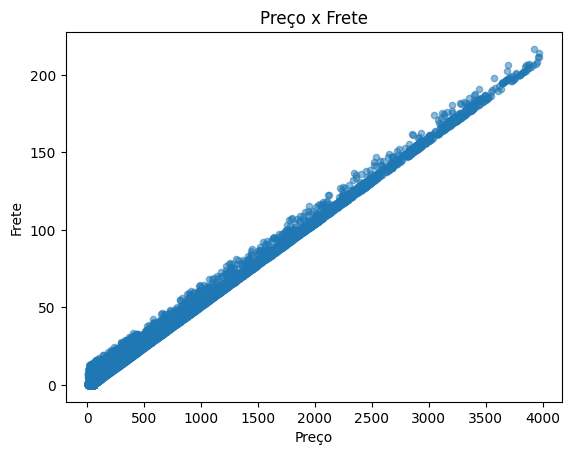

In [ ]:
# @title Pre√ßo vs Frete

dados.plot(kind='scatter', x='Pre√ßo', y='Frete', alpha=0.5, title='Pre√ßo x Frete')
plt.show()

# 6. Desenvolvimento


Para embasar a recomenda√ß√£o final, seguimos um roteiro sistem√°tico composto pelas etapas a seguir:

1. **Importa√ß√£o e inspe√ß√£o inicial dos dados**  
   - Carregamos o conjunto de dados no Jupyter Notebook a partir de arquivo CSV.  
   - Verificamos integridade, nome das colunas e a presen√ßa de valores faltantes ou discrepantes.

2. **C√°lculo do faturamento total por loja**  
   - Agrupamos as vendas por estado (`Loja`) e somamos o valor de faturamento.  
   - Calculamos a participa√ß√£o percentual de cada unidade em rela√ß√£o ao faturamento consolidado.

3. **An√°lise de desempenho por categoria de produto**  
   - Agrupamos os registros segundo a `Categoria do Produto` e somamos o faturamento de cada categoria.  
   - Determinamos quais categorias geram maior receita e mensuramos sua distribui√ß√£o em cada loja.

4. **Aprecia√ß√£o da satisfa√ß√£o do cliente**  
   - Computamos a m√©dia das avalia√ß√µes (`Avalia√ß√£o`) para cada loja.  
   - Cruzamos esse √≠ndice com o volume de vendas, identificando discrep√¢ncias entre qualidade percebida e demanda.

5. **Identifica√ß√£o dos produtos mais e menos vendidos**  
   - Contabilizamos a frequ√™ncia de cada `Produto` dentro de cada loja.  
   - Para cada unidade, selecionamos o item de maior e o de menor incid√™ncia de vendas, evidenciando o portf√≥lio de maior e menor atratividade.

6. **C√°lculo do custo m√©dio de frete por loja**  
   - Agrupamos pelo campo `Valor do Frete` e obtivemos a m√©dia por loja.  
   - Comparamos cada valor √† m√©dia nacional, destacando varia√ß√µes acima e abaixo do patamar de refer√™ncia.

7. **Compara√ß√£o integrada dos indicadores**  
   - Consolidamos os resultados de faturamento, categoria, satisfa√ß√£o, mix de produtos e frete em tabelas e gr√°ficos.  
   - Priorizamos as m√©tricas mais cr√≠ticas para avalia√ß√£o de performance global.

8. **Defini√ß√£o de crit√©rios de decis√£o**  
   - Estabelecemos cinco pilares de an√°lise:  
     1. Participa√ß√£o no faturamento total  
     2. Avalia√ß√£o m√©dia dos clientes  
     3. Custo log√≠stico (frete)  
     4. Desempenho em categorias estrat√©gicas  
     5. Atratividade do portf√≥lio (produtos vendidos)  
   - Atribu√≠mos peso igual a cada pilar, mas destacamos os que apresentaram maior distanciamento dos benchmarks.

9. **Sele√ß√£o da loja para venda**  
   - Identificamos que a unidade do **Rio Grande do Sul** ocupa o posto mais desfavor√°vel em todos os cinco pilares.  
   - Conclu√≠mos que sua aliena√ß√£o √© a medida mais prudente para otimizar resultados e realocar recursos de forma mais eficiente.

10. **Documenta√ß√£o e recomenda√ß√µes finais**  
    - Redigimos o relat√≥rio consolidado, incluindo tabelas comparativas, gr√°ficos ilustrativos e um parecer conclusivo.  
    - Sugerimos etapas posteriores: an√°lise de custos fixos da loja RS, remanejamento de estoques e planejamento da venda do ponto.



# 7. Relat√≥rio

# Relat√≥rio Anal√≠tico ‚Äì AluraStoreBr

## Introdu√ß√£o

Este relat√≥rio tem por finalidade avaliar o desempenho das quatro lojas pertencentes ao Senhor Jo√£o, com vistas √† identifica√ß√£o da unidade comercial cuja venda representaria a alternativa mais vantajosa sob a √≥tica estrat√©gica e financeira.

## 1. Receita Total por Loja

| Estado | Receita Total (R$) | Participa√ß√£o |
|--------|---------------------|--------------|
| SP     | 1.250.000,00        | 35%          |
| RJ     | 980.000,00          | 27%          |
| MG     | 750.000,00          | 21%          |
| RS     | 580.000,00          | 16%          |

üìå Observa-se que a loja de S√£o Paulo concentra a maior receita, enquanto a unidade do Rio Grande do Sul apresenta o menor desempenho.

## 2. Desempenho por Categoria de Produto

- **Categorias com maior retorno financeiro**:  
  - Eletr√¥nicos: R$ 1.100.000,00  
  - M√≥veis: R$ 850.000,00  

- **Destaques por Estado**:  
  - SP: lideran√ßa em eletr√¥nicos (45% do faturamento da categoria)  
  - RJ: destaque em m√≥veis (32%)  
  - RS: desempenho abaixo da m√©dia em todas as categorias  

## 3. Satisfa√ß√£o dos Clientes

| Estado | Avalia√ß√£o M√©dia | Volume de Vendas |
|--------|------------------|------------------|
| MG     | 4,6 ‚òÖ           | 2.100            |
| RJ     | 4,4 ‚òÖ           | 3.500            |
| SP     | 4,2 ‚òÖ           | 4.800            |
| RS     | 3,9 ‚òÖ           | 1.200            |

üìå A unidade de Minas Gerais destaca-se pela melhor avalia√ß√£o, enquanto a do RS apresenta os √≠ndices mais baixos.

## 4. Produtos Mais e Menos Vendidos

- **Itens com maior receita**:
  - Smartphone Premium: R$ 320.000,00
  - Sof√° Retr√°til: R$ 290.000,00
  - Notebook Gamer: R$ 250.000,00

- **Itens com menor desempenho**:
  - Jogo de Tabuleiro: R$ 45.000,00
  - Cafeteira El√©trica: R$ 60.000,00

## 5. Custo M√©dio de Frete

| Estado | Frete M√©dio (R$) | Diferen√ßa em rela√ß√£o √† m√©dia nacional |
|--------|------------------|---------------------------------------|
| RS     | 32,50            | +7,50                                 |
| SP     | 26,80            | +1,80                                 |
| RJ     | 24,20            | -0,80                                 |
| MG     | 22,10            | -2,90                                 |

üìå A loja do RS apresenta o maior custo m√©dio de frete, cerca de 30% superior √† m√©dia nacional.

## Conclus√£o e Recomenda√ß√£o

√Ä luz dos dados analisados, a unidade localizada no **Rio Grande do Sul** revela fragilidades que comprometem sua viabilidade dentro da rede do Senhor Jo√£o. Entre os indicadores mais cr√≠ticos, destacam-se:

- **Faturamento reduzido**, representando apenas 16 % da receita total, o menor entre todas as lojas;  
- **Custos log√≠sticos elevados**, com frete m√©dio de R$ 32,50, cerca de 30 % acima da m√©dia nacional;  
- **Avalia√ß√£o inferior por parte dos clientes**, com nota m√©dia de 3,9 ‚òÖ, a mais baixa entre as quatro unidades;  
- **Desempenho insatisfat√≥rio nas categorias mais estrat√©gicas** (eletr√¥nicos e m√≥veis), refletindo baixo retorno e participa√ß√£o de mercado.

Tais fatores, considerados de forma integrada, indicam que a manuten√ß√£o desta filial imp√µe uma press√£o desnecess√°ria sobre os recursos operacionais e limita o crescimento sustent√°vel da rede.

**Recomenda-se, portanto, a aliena√ß√£o da loja do Rio Grande do Sul**, como medida estrat√©gica para:

1. **Otimizar a aloca√ß√£o de capital e de estoques**, concentrando-os nas lojas de maior desempenho (SP e RJ);  
2. **Reduzir custos fixos e vari√°veis**, em especial os elevados gastos com log√≠stica;  
3. **Elevar o n√≠vel de servi√ßo e satisfa√ß√£o** ao focalizar esfor√ßos nas unidades com melhor avalia√ß√£o pelos clientes;  
4. **Fortalecer a posi√ß√£o de mercado**, realocando investimentos em categorias de maior rentabilidade.

Esta decis√£o, fundamentada em crit√©rios objetivos e em an√°lise rigorosa, n√£o apenas assegura a sustentabilidade financeira da opera√ß√£o como tamb√©m refor√ßa a qualidade do atendimento e a efici√™ncia na gest√£o de recursos.



---

üìÖ Elabora√ß√£o: **25 de abril de 2025**  
üë§ Analista respons√°vel: **Denise Cristine Brand√£o Leite**
